## Sorting our images from Food101 dataset

In [2]:
!ls ~/Documents/FoodVision/dataset/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [9]:
import json
from tqdm.notebook import tqdm

## Get Labels (in JSON form)

In [10]:
# Get labels
def get_labels(label_path):
    '''
    Accepts a label path (in the  form of a JSON) and returns the  file as a Python Object.
    '''
    with open(label_path) as f:
        return json.load(f)
    
train_labels = get_labels('/home/paradox/Documents/FoodVision/dataset/meta/train.json')
test_labels = get_labels('/home/paradox/Documents/FoodVision/dataset/meta/test.json')

In [11]:
# Should be 750 set for training set and 250 for test set
print(f"Train datset: {len(train_labels['apple_pie'])}")
print(f"Test datset: {len(test_labels['apple_pie'])}")

Train datset: 750
Test datset: 250


## Create target class folders and move images there

In [34]:
import shutil
import os

def copy_images(parent_folder, new_subset, dataset, target_labels):
    """
    Copies `labels[target_labels]` images from `parent_folder` to
    `new_subset` (named after `dataset`) folder.
    
    E.g. move steak images to data/steak_subset/train/ & 
    data/steak_subset/test/
    
    Parameters
    --------
    parent_folder (str) - original folder path with all data
    new_subset (str) - name of parent folder to copy to
    dataset (str) - which dataset? (train or test)
    labels (list) - list of training or test labels
    target_labels (list) - list of target labels to copy e.g. ["steak", "pizza"]
    """
    # Get the appropiate labels
    print(f"\nUsing {dataset} labels...")
    labels = get_labels("/home/paradox/Documents/FoodVision/dataset/meta/" + dataset + ".json")
    
    # Loop through target labels
    for i in target_labels:
        # Make target directory
        os.makedirs(parent_folder + '/' + new_subset + '/' + dataset + '/' + i)
        
        # Go through labels and get appropriate classes
        images_moved = [] # Keep track of images moved
        for j in labels[i]:
            # Create original image path and new path
            og_path = parent_folder + '/dataset/images/' + j + ".jpg"
            new_path = parent_folder + "/" + new_subset + "/" + dataset + "/" + j + ".jpg"
            
            # Copy images from old path to new path
            shutil.copy2(og_path, new_path)
            images_moved.append(new_path)
        print(f"Copied{len(images_moved)} images from {dataset} dataset {i} class..")

## Splitting the Dataset

In [31]:
# Get all classnames
classes = []
with open("/home/paradox/Documents/FoodVision/dataset/meta/classes.txt") as f:
    for line in f.readlines():
        classes.append(line.split("\n")[0]) 

classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [36]:
parent_folder = "/home/paradox/Documents/FoodVision"
new_subset = "all_food_classes"
datasets = ['train', 'test']

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                target_labels=classes)


Using train labels...
Copied750 images from train dataset apple_pie class..
Copied750 images from train dataset baby_back_ribs class..
Copied750 images from train dataset baklava class..
Copied750 images from train dataset beef_carpaccio class..
Copied750 images from train dataset beef_tartare class..
Copied750 images from train dataset beet_salad class..
Copied750 images from train dataset beignets class..
Copied750 images from train dataset bibimbap class..
Copied750 images from train dataset bread_pudding class..
Copied750 images from train dataset breakfast_burrito class..
Copied750 images from train dataset bruschetta class..
Copied750 images from train dataset caesar_salad class..
Copied750 images from train dataset cannoli class..
Copied750 images from train dataset caprese_salad class..
Copied750 images from train dataset carrot_cake class..
Copied750 images from train dataset ceviche class..
Copied750 images from train dataset cheesecake class..
Copied750 images from train da

Copied250 images from test dataset grilled_cheese_sandwich class..
Copied250 images from test dataset grilled_salmon class..
Copied250 images from test dataset guacamole class..
Copied250 images from test dataset gyoza class..
Copied250 images from test dataset hamburger class..
Copied250 images from test dataset hot_and_sour_soup class..
Copied250 images from test dataset hot_dog class..
Copied250 images from test dataset huevos_rancheros class..
Copied250 images from test dataset hummus class..
Copied250 images from test dataset ice_cream class..
Copied250 images from test dataset lasagna class..
Copied250 images from test dataset lobster_bisque class..
Copied250 images from test dataset lobster_roll_sandwich class..
Copied250 images from test dataset macaroni_and_cheese class..
Copied250 images from test dataset macarons class..
Copied250 images from test dataset miso_soup class..
Copied250 images from test dataset mussels class..
Copied250 images from test dataset nachos class..
Co

## Let's View some images

In [44]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_three_images(target_dir, target_class):
    """
    Randomly selects and displays 3 random images from `target_class` folder in `target_dir` folder.
    
    Requires target_dir to be in format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
                 
    """
    target_path = target_dir+target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)
    
    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

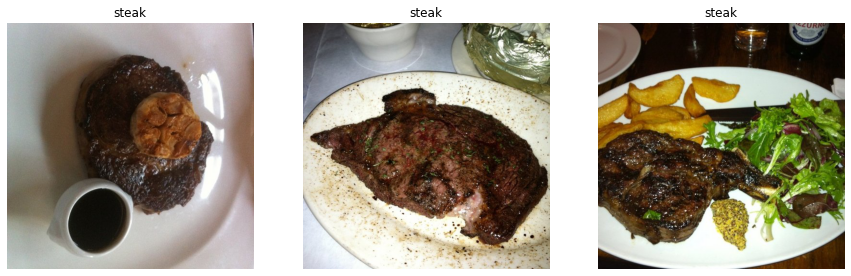

In [46]:
view_three_images(target_dir="/home/paradox/Documents/FoodVision/all_food_classes/test/", 
                  target_class="steak")